# Credit score classification project

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import seaborn as sns

# Train test split

In [127]:
data = pd.read_csv('train.csv') # dataframe containg everything, not only train
# test = pd.read_csv('test.csv') this one doesn't works - missing target value

test_size = 0.2
X = data.drop(columns=["Credit_Score"]).copy()
y = data["Credit_Score"] # the target 


X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=test_size, shuffle=False) 
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=test_size, shuffle=False) 
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size, shuffle=False)

C:\Users\Aleks\AppData\Local\Temp\ipykernel_18512\812956692.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv') # dataframe containg everything, not only train


In [128]:
# merged in order to perfrom preprocessing efficiently
train = X_train.join(y_train)
val = X_val.join(y_val)

# Data Examination

In [129]:
train.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64000 entries, 0 to 63999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        64000 non-null  object 
 1   Customer_ID               64000 non-null  object 
 2   Month                     64000 non-null  object 
 3   Name                      57607 non-null  object 
 4   Age                       64000 non-null  object 
 5   SSN                       64000 non-null  object 
 6   Occupation                64000 non-null  object 
 7   Annual_Income             64000 non-null  object 
 8   Monthly_Inhand_Salary     54425 non-null  float64
 9   Num_Bank_Accounts         64000 non-null  int64  
 10  Num_Credit_Card           64000 non-null  int64  
 11  Interest_Rate             64000 non-null  int64  
 12  Num_of_Loan               64000 non-null  object 
 13  Type_of_Loan              56824 non-null  object 
 14  Delay_

In [131]:
train["Customer_ID"].value_counts().loc[train["Customer_ID"].value_counts() != 8].size 
# every customer shows up exactly 8 times

0

In [132]:
train['Credit_Score'].isna().sum() # all target values are present

0

(array([11469.,     0.,     0.,     0.,     0., 33817.,     0.,     0.,
            0., 18714.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

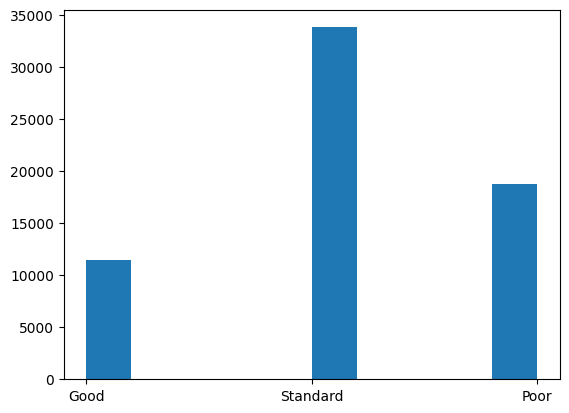

In [133]:
plt.hist(train["Credit_Score"]) # target distribution

In [134]:
train[["Name", "SSN", "Customer_ID"]].head(10) # name, customer id and SSN are redundant

,Name,SSN,Customer_ID
0,Aaron Maashoh,821-00-0265,CUS_0xd40
1,Aaron Maashoh,821-00-0265,CUS_0xd40
2,Aaron Maashoh,821-00-0265,CUS_0xd40
3,Aaron Maashoh,821-00-0265,CUS_0xd40
4,Aaron Maashoh,821-00-0265,CUS_0xd40
5,Aaron Maashoh,821-00-0265,CUS_0xd40
6,Aaron Maashoh,821-00-0265,CUS_0xd40
7,NaN,#F%$D@*&8,CUS_0xd40
8,Rick Rothackerj,004-07-5839,CUS_0x21b1
9,Rick Rothackerj,004-07-5839,CUS_0x21b1


In [135]:
columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Outstanding_Debt',
                    'Amount_invested_monthly', 'Monthly_Balance']

train[columns_to_alter].iloc[10:20] # some columns have weird signs - "_" and are of wrong format

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
10,28,34847.84_,1,-1,5.42,605.03,58.51597569589465,466.46647639764313
11,28,34847.84,1,3_,5.42,605.03,99.30622796053305,465.6762241330048
12,28,34847.84,1,1,6.42,605.03,130.11542024292334,444.8670318506144
13,28,34847.84,1,0,5.42,605.03,43.477190144355745,481.505261949182
14,28,34847.84,1,4,5.42,605.03,70.10177420755677,464.8806778859809
15,28,34847.84,1,4,5.42,605.03,218.90434353388733,356.07810855965045
16,34,143162.64,3,8,7.1,1303.01,168.413702679309,1043.3159778669492
17,34,143162.64,3,6,7.1,1303.01,232.86038375993544,998.8692967863226
18,34,143162.64,3,7,11.1,1303.01,__10000__,715.741367403555
19,34,143162.64,3,5,9.1,1303.01,825.2162699393922,426.5134106068658


In [136]:
# how different are categorical columns

print(train['Payment_of_Min_Amount'].unique(), "\n\n",
      train['Occupation'].unique(), "\n\n",
      train["Credit_Mix"].unique(), "\n\n",
      train["Payment_Behaviour"].unique())

['No' 'NM' 'Yes'] 

 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

 ['_' 'Good' 'Standard' 'Bad'] 

 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [137]:
# account age, and behaviour are in unfriendly format

train[["Credit_History_Age", "Payment_Behaviour"]].head()

,Credit_History_Age,Payment_Behaviour
0,22 Years and 1 Months,High_spent_Small_value_payments
1,NaN,Low_spent_Large_value_payments
2,22 Years and 3 Months,Low_spent_Medium_value_payments
3,22 Years and 4 Months,Low_spent_Small_value_payments
4,22 Years and 5 Months,High_spent_Medium_value_payments


<AxesSubplot:>

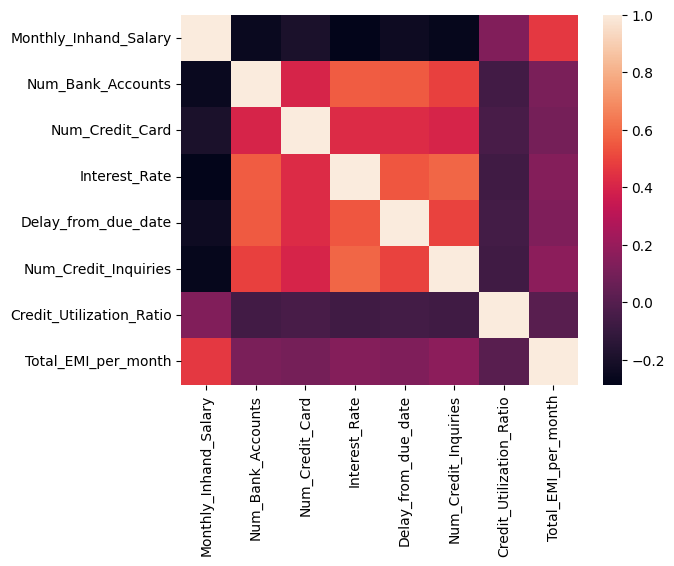

In [138]:
sns.heatmap(train.corr(method="spearman"))

## Search for outliers

In [139]:
description = train.describe()

print(description)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           54425.000000       64000.000000     64000.000000   
mean             4200.666742          17.011688        22.776141   
std              3195.453352         117.426876       130.332827   
min               319.556250          -1.000000         0.000000   
25%              1628.297500           3.000000         4.000000   
50%              3081.902500           6.000000         6.000000   
75%              5967.333333           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   64000.000000         64000.000000          62794.000000   
mean       70.978344            21.120750             27.466223   
std       459.881448            14.823882            190.055037   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Customer_ID'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SSN'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Type_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
  

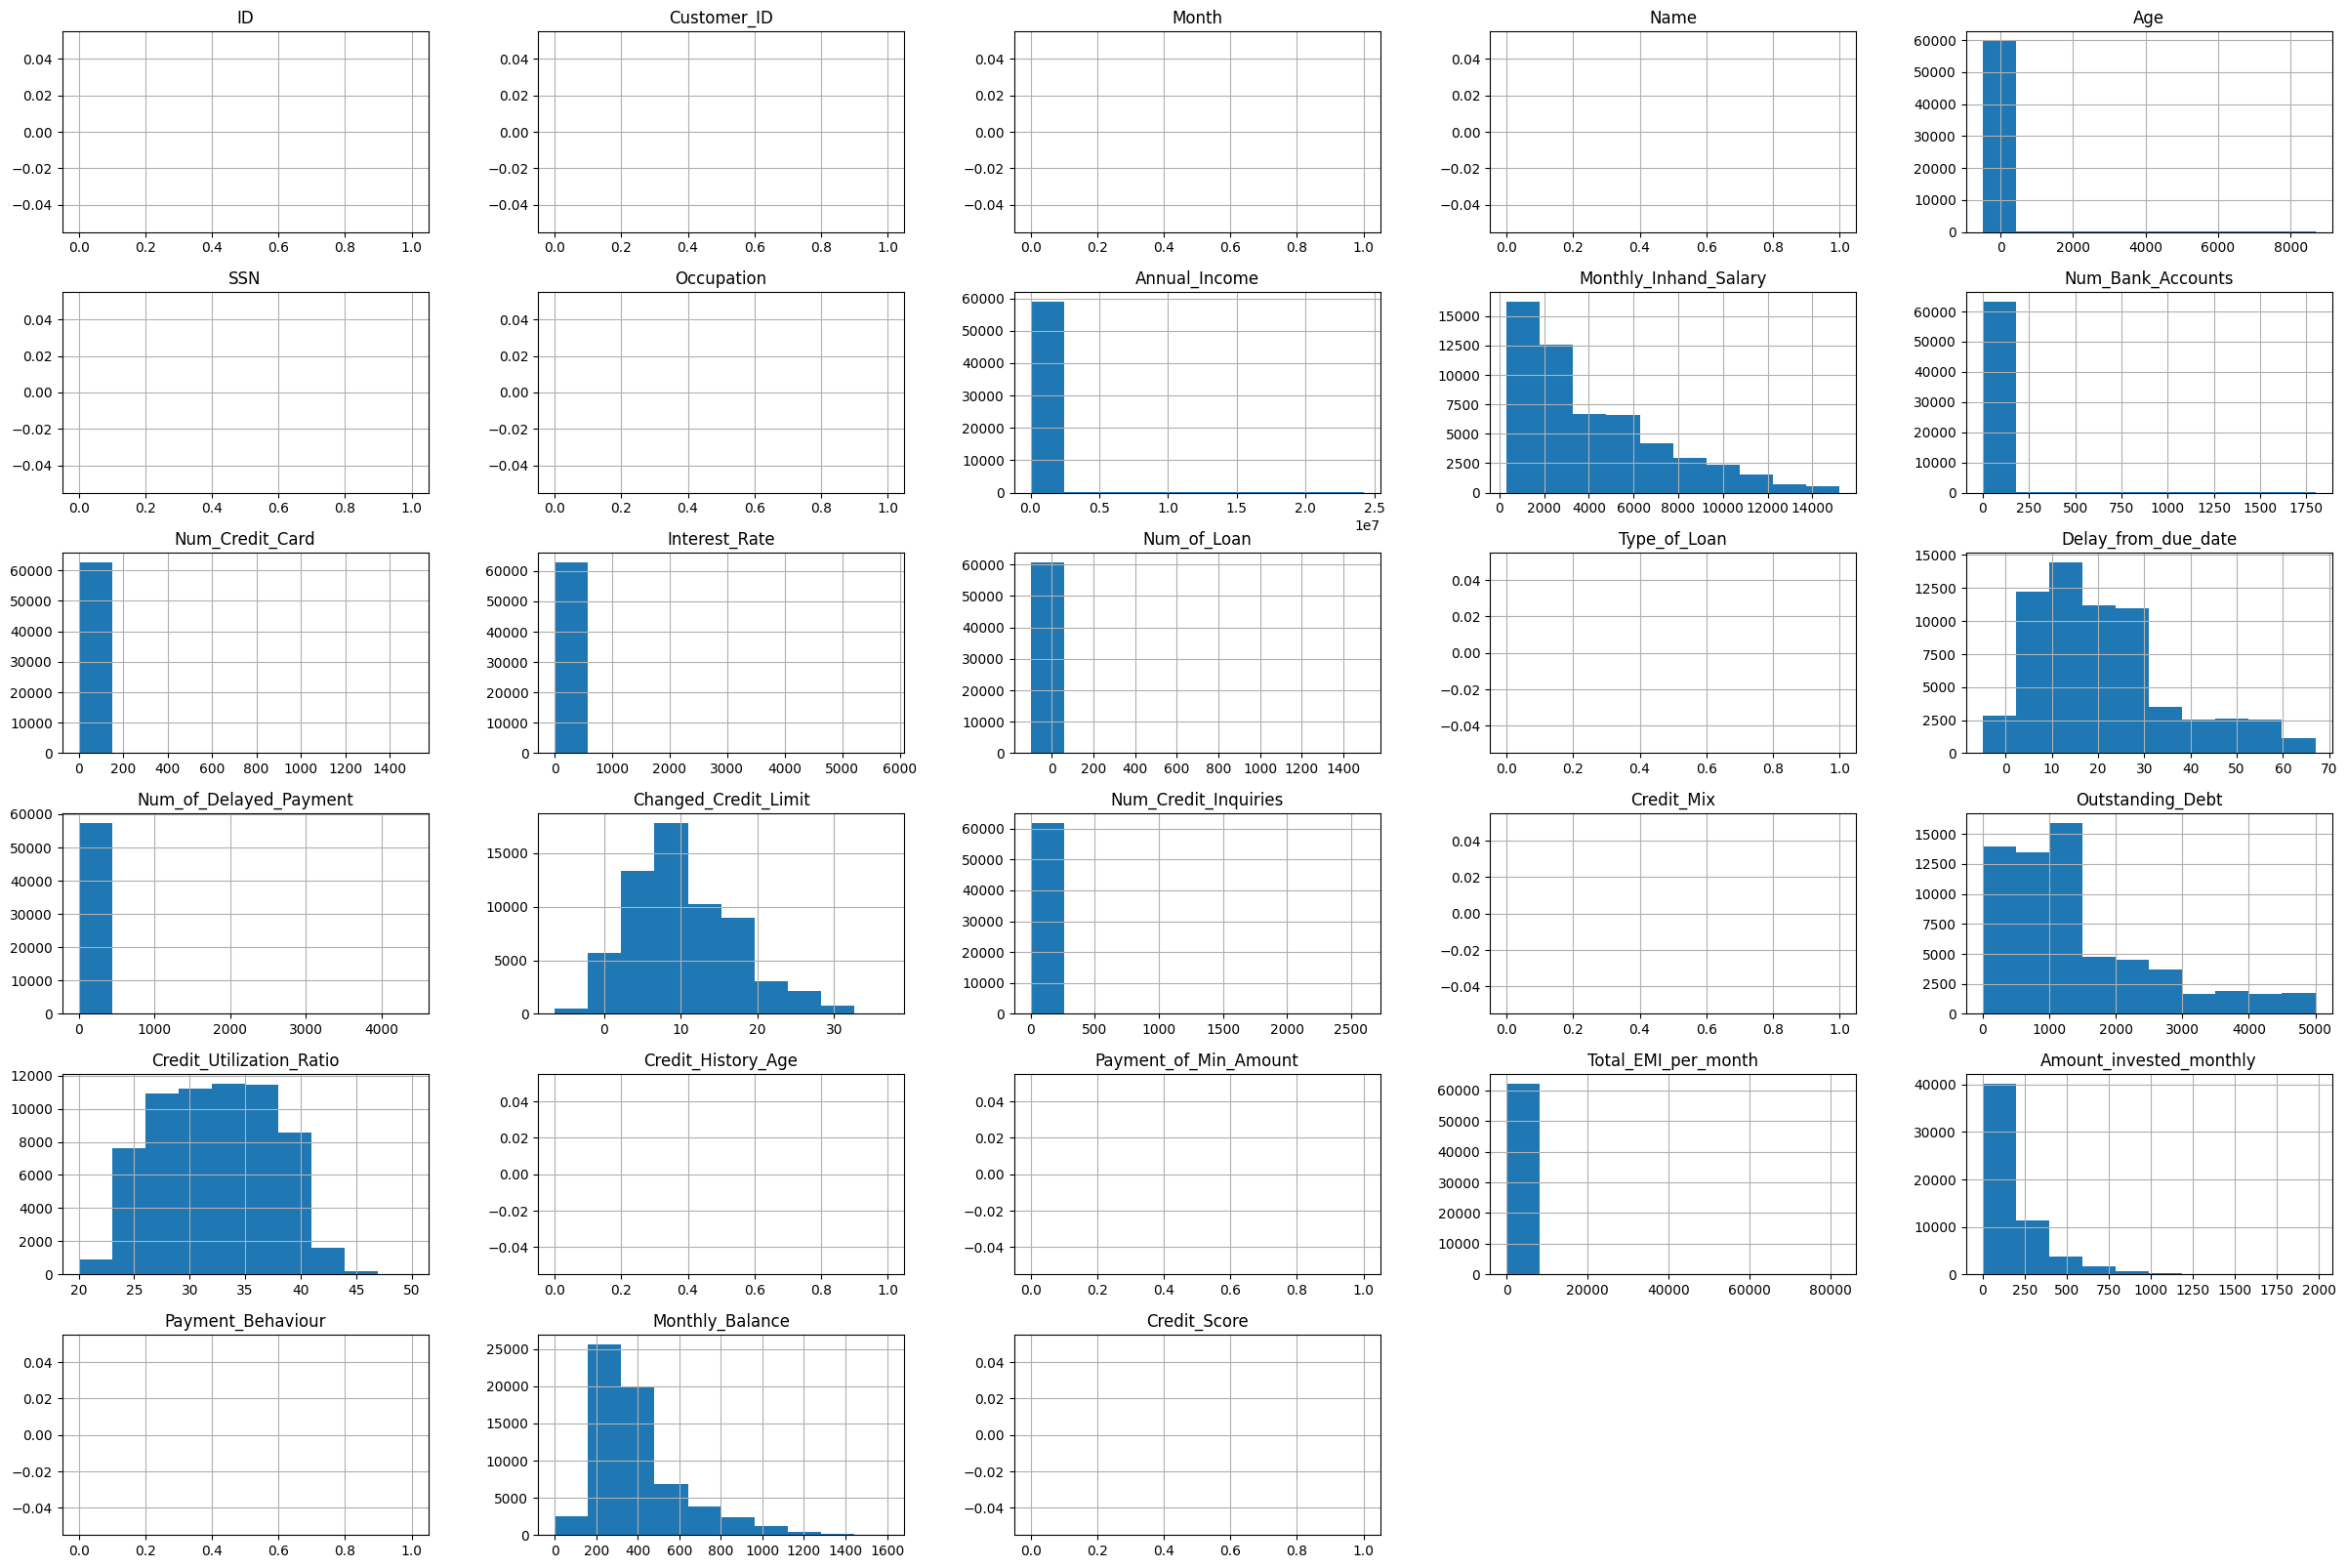

In [140]:
df = train.copy()
for col in train.columns:
    df[col] = pd.to_numeric(train[col], errors='coerce') # errors='coerce', then invalid parsing will be set as NaN

# distribution of all the variables
df.hist(figsize=(30, 20))

In [141]:
# we choose outliers by looking at the plots

columns_with_outliers = ["Age", "Annual_Income", "Num_Bank_Accounts", 
                         "Num_Credit_Card", "Interest_Rate", 
                         "Num_of_Loan", "Num_of_Delayed_Payment",
                         "Num_Credit_Inquiries", "Total_EMI_per_month"]


df[columns_with_outliers].quantile(0.98)

Age                           56.00
Annual_Income             166891.60
Num_Bank_Accounts             10.00
Num_Credit_Card              187.02
Interest_Rate                 60.08
Num_of_Loan                    9.00
Num_of_Delayed_Payment        25.00
Num_Credit_Inquiries          17.00
Total_EMI_per_month        29527.08
Name: 0.98, dtype: float64

<AxesSubplot:>

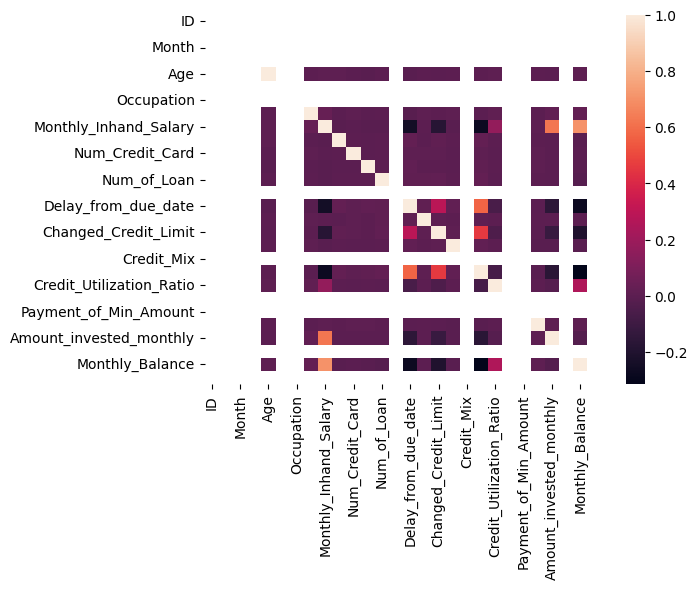

In [142]:
# correlation between columns 
sns.heatmap(df.corr())

<BarContainer object of 3 artists>

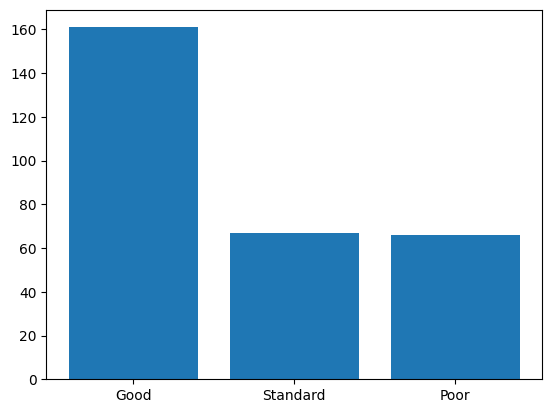

In [143]:
# Monthly_Inhand_Salary is strongly correlated with Monthly_Balance and 
# Amount_Invested_Monthly but those are not correlated with each other

plt.bar(x = train["Credit_Score"].unique(),
        height=train.loc[df["Num_of_Loan"]>=15]["Credit_Score"].value_counts())

# Data Preprocessing

In [144]:
def id_columns(df):
    df = df.drop(["Name", "SSN", "ID"], axis="columns") # no added value, all the information in Customer_ID
    df["Customer_ID"] = df["Customer_ID"].apply(lambda x: int(x[4:], 16)) # convert to int
    
    return df

In [145]:
def clear_numeric_data(col):
    # some of the rows contain "_" sign
    col.astype(str).replace("_", "")
    return pd.to_numeric(col, errors="coerce") # errors='coerce', then invalid parsing will be set as NaN

In [146]:
# function for cleaning numeric data where necessary
def altering(df):
    
    columns_to_alter = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment',
                        'Changed_Credit_Limit', 'Outstanding_Debt',
                        'Amount_invested_monthly', 'Monthly_Balance']

    df[columns_to_alter] = df[columns_to_alter].apply(clear_numeric_data, axis=1)
    return df

In [147]:
def delete_outliers(column, a=0, b=0.98, use_quantiles=True):
    # function helps removing quantiles from a column, 
    # if parameter (use_quantiles) is False, removes outliers outside given range (a, b)
    # otherwise removes top quantiles
    
    col = np.where(a < column, column, float('nan'))
    if use_quantiles:
        return np.where(col <= column.quantile(b), column, float('nan'))
    return np.where(col <= b, column, float('nan'))


def handle_outliers(df):
    df["Age"] = np.where((0 > df["Age"]), -df["Age"], df["Age"]) # deleting weird outliers
    df['Age'] = delete_outliers(df["Age"], 0, 100, use_quantiles=False)
    
    df["Annual_Income"] = delete_outliers(df["Annual_Income"])
    df["Num_Bank_Accounts"] = delete_outliers(df["Num_Bank_Accounts"])
    df["Num_of_Loan"] = delete_outliers(df["Num_of_Loan"])
    df["Interest_Rate"] = delete_outliers(df["Interest_Rate"])
    df["Num_Credit_Card"] = delete_outliers(df["Num_Credit_Card"], 0, 0.97)
    df["Num_of_Delayed_Payment"] = delete_outliers(df["Num_of_Delayed_Payment"])
    df["Num_Credit_Inquiries"] = delete_outliers(df["Num_Credit_Inquiries"])
    df["Total_EMI_per_month"] = delete_outliers(df["Total_EMI_per_month"], 0, 0.95)
    
    
    return df

## Encoding categorical data

In [148]:
train["Occupation"] = np.where(train["Occupation"] == "_______", "Unknown", train["Occupation"])
occupations_list = train["Occupation"].unique()
occupations_list

array(['Scientist', 'Unknown', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [149]:
# first we fill the information for customers that have other rows with full information available
train['Type_of_Loan'].fillna(train.groupby('Customer_ID')['Type_of_Loan'].first(), inplace=True)
# later we fill with ''
train['Type_of_Loan'].fillna('', inplace=True)
    
loan_types_list =  train['Type_of_Loan'].value_counts().head(9).index[1:] 

In [150]:
def encode_categorical(df):
    # encode columns where necessary (Credit_Mix, Payment_of_Min_Amount, Credit_Score)
    # mapping
    credit_mix_dict = {'Bad':0, 'Standard':1, 'Good':2, '_':float('nan')}
    poma_dict = {'No':0, 'Yes':1, 'NM':float('nan')}
    credit_score_dict = {'Poor':0, 'Standard':1, 'Good':2}
    month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5,
                "June": 6, "July": 7, "August": 8}
    
    
    df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(poma_dict)
    df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_dict)
    df['Credit_Score'] = df['Credit_Score'].map(credit_score_dict)
    df["Month"] = df["Month"].map(month_dict)
    
    # Payment_Behaviour column brings two informations, one about spending, other about value payments
    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    
    
    del df["Payment_Behaviour"]
    
    
    for loan_type in loan_types_list: # the single types of loans
        df[loan_type] = df['Type_of_Loan'].str.contains(loan_type)
    del df["Type_of_Loan"]
    
    
    # credit history age    
    df['Credit_History_Age'] = df['Credit_History_Age'].apply(history_age)
    
    # Occupation - ____ for uneployed
    df["Occupation"] = np.where(df["Occupation"] == "_______", "Unknown", df["Occupation"])

    df["Occupation"] = np.where(df["Occupation"].isin(occupations_list), df["Occupation"], "Unknown") # to handle different occupations in test data
    
    df = df.join(pd.get_dummies(df['Occupation']))

    del df["Occupation"]
    
    return df

## handling NaNs

In [151]:
def impute_values(df): # this works but very slowly
    
    continuous_values = ['Monthly_Inhand_Salary', 'Amount_invested_monthly',
                         'Monthly_Balance', 'Credit_History_Age', "Outstanding_Debt",
                         "Changed_Credit_Limit", "Annual_Income"]
    
    for column in continuous_values:
        df[column] = df[column].fillna(df.groupby('Customer_ID')[column].transform("mean"))
    # using mean is not causing any trouble here, we're practically taking the value that appears
    # in the rows with the same id
        
    
    discrete_columns = ["Age", "Num_Credit_Inquiries", "Num_of_Loan", "Credit_Mix",
                        "Num_of_Delayed_Payment", "Num_Credit_Inquiries", 
                        "Spending_Behaviour", "Payment_of_Min_Amount", "Value_Payments"]
    # for discrete values we'll impute nans with mode
    for column in discrete_columns:
        #train[column].fillna(train.groupby('Customer_ID')[column].agg(lambda x: pd.Series.mode(x)[0]), inplace=True) 
        df[column].fillna(df.groupby('Customer_ID')[column].transform('median'), inplace=True) 
        pass
    
    df = df.fillna(df.mean()) # in case a customer doesn't have any entries

    return df


In [152]:
# processing Credit_History_Age so that's continuous
import re
def history_age(age):
    try : 
        years = int(re.findall('[0-9]+', age)[0])
        month = int(re.findall('[0-9]+', age)[1])
        return years*12 + month
    except :
        return np.nan
    
import re

In [153]:
def impute_discrete_string(df):

    discrete_string_columns = ["Occupation", "Type_of_Loan", "Payment_Behaviour"]
    # fill missing data in columns that are strings

    for column in discrete_string_columns:
        most_common_globally = df[column].agg(lambda x: pd.Series.mode(x)[0])
        df[column].fillna(df.groupby('Customer_ID')[column].agg(
            lambda x: (most_common_globally if len(pd.Series.mode(x)) == 0 else pd.Series.mode(x)[0])
            ), inplace=True) 
        
    return df

## Pipeline

In [154]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

drop_transformer = FunctionTransformer(id_columns)
altering_transformer = FunctionTransformer(altering)
outlier_transformer = FunctionTransformer(handle_outliers)
categorical_transformer = FunctionTransformer(encode_categorical)
imputer_transformer = FunctionTransformer(impute_values)
discrete_imputer_transformer = FunctionTransformer(impute_discrete_string)

# all the afore declared processings applied
prepipe = Pipeline([
    ("drop", drop_transformer),
    ("altering", altering_transformer),
    ("outliers", outlier_transformer),
    ("impute_discrete_string", discrete_imputer_transformer),
    ("categorical", categorical_transformer),
    ("impute", imputer_transformer)
])

In [155]:
train = prepipe.fit_transform(train)

In [156]:
# check outliers - we change the outliers pipe
described = train.describe()

<AxesSubplot:>

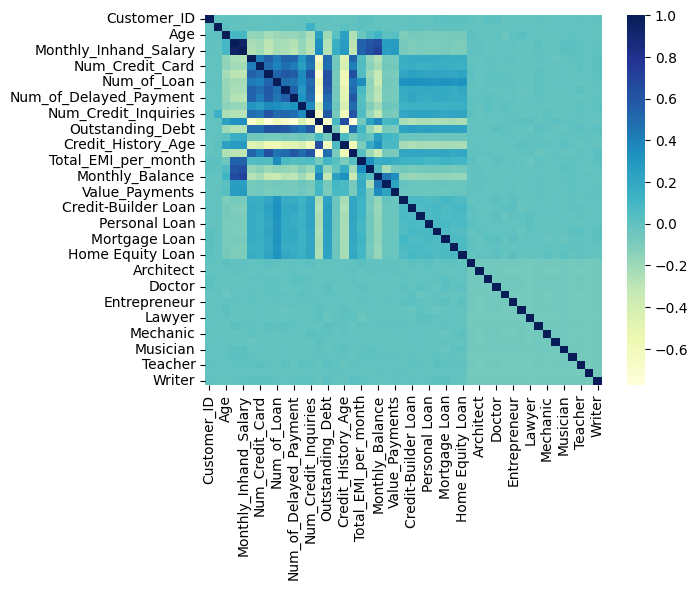

In [230]:
sns.heatmap(train.corr(), cmap="YlGnBu")

# Choice of columns

<AxesSubplot:>

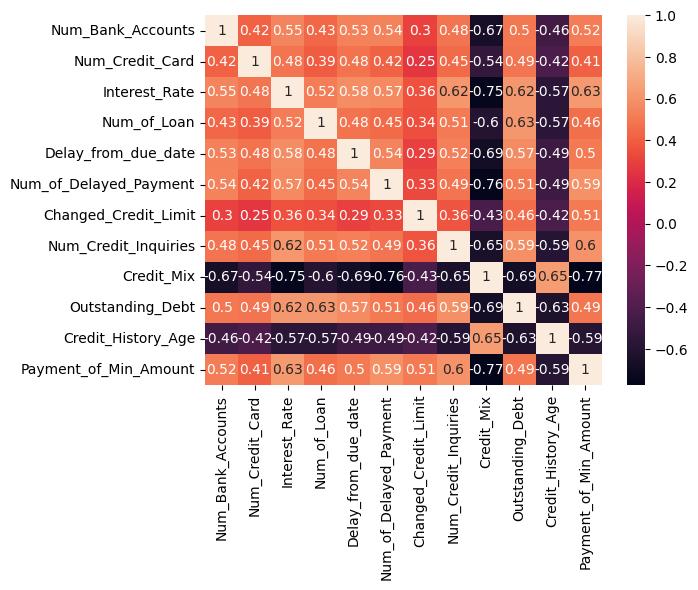

In [158]:
# first we'll take a look at correlated columns
# train_dropped = train_transformed.drop(columns = ["Monthly_Balance",
#                                                   "Amount_invested_monthly",
#                                                   "Annual_Income"])
    

# train_corr = train_dropped.corr()

# t = (abs(train_corr) > 0.5) + 0.

# strong_corelation_columns = ["Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
#                              "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment",
#                              "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_Mix",
#                              "Outstanding_Debt", "Credit_History_Age", 
#                              "Payment_of_Min_Amount"]


# sns.heatmap(train_dropped[strong_corelation_columns].corr(), annot=True)



# Model

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [160]:
# training dataset
y = train['Credit_Score']
del train['Credit_Score']
y_train = y
X_train = train

In [161]:
# validation dataset
val = prepipe.fit_transform(val)
X_val = val
y_val = val["Credit_Score"]
del X_val["Credit_Score"]

# Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf_model = RandomForestClassifier(n_estimators=120)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [165]:
y_pred = rf_model.predict(X_val)

In [166]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      4393
           1       0.73      0.74      0.74      8499
           2       0.63      0.53      0.58      3108

    accuracy                           0.69     16000
   macro avg       0.68      0.66      0.67     16000
weighted avg       0.69      0.69      0.69     16000



In [247]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   X_val.columns,
                                   columns=['Importance'])

In [229]:
feature_importances.sort_values(by='Importance', ascending=False).head(10)

,Importance
Outstanding_Debt,0.094354
Interest_Rate,0.068167
Credit_Mix,0.064336
Credit_History_Age,0.059817
Delay_from_due_date,0.051880
Changed_Credit_Limit,0.049118
Monthly_Balance,0.040721
Amount_invested_monthly,0.039512
Num_Credit_Card,0.038915
Credit_Utilization_Ratio,0.037645


# Dropping highly correlated columns

In [317]:
columns_to_delete = []
for i in range(len(X_train.columns)):
    for j in range(i+1, len(X_train.columns)):
        # we iterate over every pair of columns
        # if the correlation between them is over 0.5 we eliminate the less predictive (for our particular model) column
        if (abs(X_train[X_train.columns[i]].corr(X_train[X_train.columns[j]])) > 0.5):
            if feature_importances.loc[X_train.columns[i]][0] < feature_importances.loc[X_train.columns[j]][0]:
                columns_to_delete.append(feature_importances.loc[X_train.columns[i]].name)
            else:
                columns_to_delete.append(feature_importances.loc[X_train.columns[j]].name)

In [318]:
columns_to_delete = list(set(columns_to_delete)) # get unique values
columns_to_delete

['Total_EMI_per_month',
 'Interest_Rate',
 'Num_Credit_Card',
 'Num_of_Delayed_Payment',
 'Annual_Income',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Num_Credit_Inquiries',
 'Delay_from_due_date',
 'Num_of_Loan',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts']

In [319]:
X_train_2 = X_train.drop(columns_to_delete, axis=1)
X_val_2 = X_val.drop(columns_to_delete, axis=1) 

# New model, trained without highly correlated columns

In [320]:
rf_model_2 = RandomForestClassifier(n_estimators=100)
rf_model_2.fit(X_train_2, y_train)

RandomForestClassifier()

In [321]:
y_pred_2 = rf_model_2.predict(X_val_2)

In [322]:
print(classification_report(y_pred_2, y_val))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      4148
           1       0.80      0.63      0.71     11045
           2       0.10      0.32      0.15       807

    accuracy                           0.63     16000
   macro avg       0.50      0.55      0.50     16000
weighted avg       0.72      0.63      0.66     16000



# XGBoost attempt

In [323]:
from sklearn.ensemble import GradientBoostingClassifier

In [327]:
gbc_model= GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [328]:
y_pred_xgboost = gbc_model.predict(X_val)

In [342]:
print(classification_report(y_pred_xgboost, y_val))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      4389
           1       0.73      0.75      0.74      8451
           2       0.65      0.54      0.59      3160

    accuracy                           0.70     16000
   macro avg       0.68      0.67      0.67     16000
weighted avg       0.70      0.70      0.70     16000



In [59]:
# not in current use
import shap

def shapley(model, X_train, X_val):
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[1])
    
    shap.plots.heatmap(shap_values)
    
    # fig = shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)
    # fig.savefig('testplot.png')
    # fig.plot()
    
    # fig = shap.force_plot(shap_values, X_train)
    # fig.plot()
   
    shap_values = explainer(X_val)
    shap.plots.beeswarm(shap_values)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    
    # freature importance
    shap.summary_plot(shap_values, X_val, plot_type="bar")